# 1).Import the required libraries and load the training and testing dataset
### IN ADVANCE WE WILL ADD ALL LIBRARIES RELATED TO DIFFERENT ALGORITH

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy import stats

#  2).Analyze the dataset and write your observations

In [3]:
df_train = pd.read_csv("data/train.csv")
df_train.head(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,05-02-2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,09-05-2012 04:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981


In [4]:
col=['Total_booking']
df_train_label= pd.read_csv('data/train_label.csv',header=None,names=col)

In [5]:
df_train_label.head(4)

,Total_booking
0,504
1,5
2,139
3,209


#### Appending the train_label dataset to train.csv as ‘Total_booking’ column.

In [6]:
train=df_train.join(df_train_label)
train.head(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,05-02-2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,09-05-2012 04:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209


In [7]:
train.shape

(8708, 10)

In [8]:
df_test=pd.read_csv("data/test.csv")
df_test_label=pd.read_csv("data/test_label.csv",header=None,names=["Total_booking"])

In [9]:
test = df_test.join(df_test_label)
test.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
1388,12/19/2011 11:00,Winter,0,1,Clear + Few clouds,10.66,12.120,65,16.9979,127
2116,11/14/2011 2:00,Winter,0,1,Clear + Few clouds,18.86,22.725,63,23.9994,17
1229,3/17/2011 0:00,Spring,0,1,Clear + Few clouds,15.58,19.695,66,16.9979,23


#### a).Check the shape of the training and testing set

In [10]:
train.shape

(8708, 10)

In [11]:
test.shape

(2178, 10)

#### b).Print the data types of each column

In [12]:
train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [13]:
test.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

#### c).Check the missing values present in the dataset

In [14]:
train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [15]:
test.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

## Q3) Perform Feature Engineering: 


### a).Create new columns date, hour, weekDay, month from datetime column

In [16]:
from datetime import datetime
import calendar

In [17]:
# Creating new columns from date time column
train['date']= train.datetime.apply(lambda x : x.split()[0])
train['hour']= train.datetime.apply(lambda x : x.split()[1].split(":")[0])


test['date']= test.datetime.apply(lambda x : x.split()[0])
test['hour']= test.datetime.apply(lambda x : x.split()[1].split(":")[0])


In [18]:
train.sample(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour
1334,01-06-2011 12:00,Spring,0,1,Clear + Few clouds,10.66,14.395,35,0.0000,84,01-06-2011,12
8180,06-10-2012 23:00,Summer,0,0,Clear + Few clouds,29.52,33.335,58,7.0015,110,06-10-2012,23
6070,9/17/2012 18:00,Fall,0,1,Mist + Cloudy,25.42,29.545,73,11.0014,774,9/17/2012,18
24,8/14/2011 17:00,Fall,0,0,Clear + Few clouds,31.16,35.605,62,8.9981,329,8/14/2011,17


In [19]:
# join both train and test it will be easy to perform feature engineering on single data frame
df = pd.concat([train, test])
df.shape

(10886, 12)

In [20]:
def convert_to_mdy_format(date_str):
    try:
        # Try parsing as '%m/%d/%Y' format
        date_obj = pd.to_datetime(date_str, format='%m/%d/%Y')
        return date_obj.strftime('%m/%d/%Y')
    except ValueError:
        try:
            # If that fails, parse as '%m-%d-%Y' format
            date_obj = pd.to_datetime(date_str, format='%m-%d-%Y')
            return date_obj.strftime('%m/%d/%Y')
        except ValueError:
            return "Invalid Date"

# Apply the function to the date_column
df['date'] = df['date'].apply(convert_to_mdy_format)    



In [21]:
df.sample(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour
1297,7/14/2011 11:00,Fall,0,1,Clear + Few clouds,29.52,32.575,37,15.0013,148,07/14/2011,11
3844,8/18/2011 22:00,Fall,0,1,Mist + Cloudy,28.70,33.335,74,7.0015,135,08/18/2011,22
7887,12/19/2011 12:00,Winter,0,1,Clear + Few clouds,12.30,13.635,61,22.0028,141,12/19/2011,12
8439,09-03-2011 17:00,Fall,0,0,Clear + Few clouds,29.52,34.090,70,15.0013,371,09/03/2011,17


In [22]:
df["weekday"]= df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
df["month"]= df.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [23]:
df.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
1829,4/15/2012 1:00,Summer,0,0,Mist + Cloudy,22.14,25.760,56,11.0014,106,04/15/2012,1,Sunday,April
3400,03-06-2012 04:00,Spring,0,1,Clear + Few clouds,7.38,8.335,51,19.9995,3,03/06/2012,04,Tuesday,March
2132,11/19/2011 4:00,Winter,0,0,Clear + Few clouds,10.66,11.365,48,22.0028,8,11/19/2011,4,Saturday,November


### b) Coerce the datatype of season, holiday, workingday, and weather to category


In [24]:
df['holiday'].dtype

dtype('int64')

In [25]:
df[['season','holiday','workingday']] = df[['season','holiday','workingday']].astype('category')

In [26]:
df['workingday'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

### c) Drop the datetime column as we have already extracted useful features from it

In [27]:
df=df.drop('datetime',axis=1)

In [28]:
df.sample(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
2133,Winter,0,1,Clear + Few clouds,26.24,30.305,65,7.0015,441,10/04/2012,20,Thursday,October
8063,Winter,0,0,Mist + Cloudy,18.04,21.970,62,8.9981,22,10/07/2012,03,Sunday,October
4394,Fall,0,1,Clear + Few clouds,29.52,32.575,39,8.9981,274,09/13/2012,14,Thursday,September


# 4. Perform Outlier Analysis:

### a) Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2177
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         10886 non-null  category
 1   holiday        10886 non-null  category
 2   workingday     10886 non-null  category
 3   weather        10886 non-null  object  
 4   temp           10886 non-null  float64 
 5   atemp          10886 non-null  float64 
 6   humidity       10886 non-null  int64   
 7   windspeed      10886 non-null  float64 
 8   Total_booking  10886 non-null  int64   
 9   date           10886 non-null  object  
 10  hour           10886 non-null  object  
 11  weekday        10886 non-null  object  
 12  month          10886 non-null  object  
dtypes: category(3), float64(3), int64(2), object(5)
memory usage: 967.8+ KB


In [30]:
df['hour']=df[['hour']].astype("int")

In [31]:
df.describe()

,temp,atemp,humidity,windspeed,Total_booking,hour
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,191.574132,11.541613
std,7.79159,8.474601,19.245033,8.164537,181.144454,6.915838
min,0.82000,0.760000,0.000000,0.000000,1.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,42.000000,6.000000
50%,20.50000,24.240000,62.000000,12.998000,145.000000,12.000000
75%,26.24000,31.060000,77.000000,16.997900,284.000000,18.000000
max,41.00000,45.455000,100.000000,56.996900,977.000000,23.000000


In [32]:
columns_to_check = ["hour", "temp", "humidity", "windspeed", "atemp"]

# Dictionary to store IQR and outlier count for each column
outlier_info = {}

# Loop through each column and calculate IQR and count outliers
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = len(outliers)
    
    # Store IQR and outlier count in the dictionary
    outlier_info[column] = {'IQR': IQR, 'outlier_count': outlier_count}

# Display the IQR and outlier count for each column
for column, info in outlier_info.items():
    print(f"Column: {column}")
    print(f"IQR: {info['IQR']}")
    print(f"Number of Outliers: {info['outlier_count']}")
    print()

Column: hour
IQR: 12.0
Number of Outliers: 0

Column: temp
IQR: 12.299999999999999
Number of Outliers: 0

Column: humidity
IQR: 30.0
Number of Outliers: 22

Column: windspeed
IQR: 9.996400000000001
Number of Outliers: 227

Column: atemp
IQR: 14.395
Number of Outliers: 0



C:\Users\VISHAL_\AppData\Local\Temp\ipykernel_21860\763417164.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["humidity"])
C:\Users\VISHAL_\AppData\Local\Temp\ipykernel_21860\763417164.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["windspeed"])


<function matplotlib.pyplot.show(close=None, block=None)>

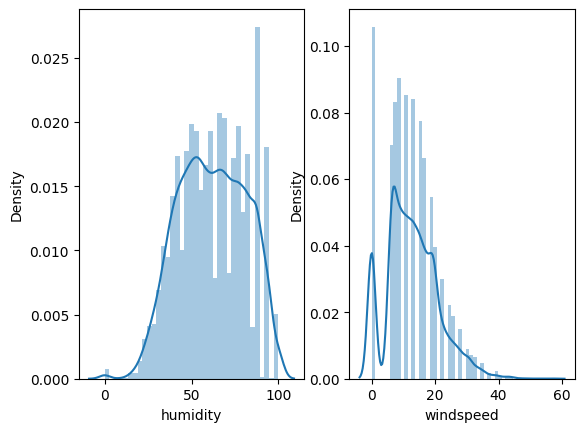

In [33]:
plt.subplot(1,2,1)
sns.distplot(df["humidity"])
plt.subplot(1,2,2)
sns.distplot(df["windspeed"])
plt.show

In [34]:
df["humidity"].skew()

-0.08633518364548579

In [35]:
df['windspeed'].skew()

0.5887665265853951

#### so from distplt and from iqr method of detection of outlier, outliers present only in two column HUMIDITY and WINDSPEED and we can remove them because they not large in number, if outlier are more in number then we can cap them instead of removing

In [36]:
columns_with_outliers = ["windspeed", "humidity"]


df_new = df.copy()
# Loop through columns and remove rows with outliers
for column in columns_with_outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers
    df_new= df_new[(df_new[column] >= lower_bound) & (df_new[column] <= upper_bound)]



In [37]:
df_new.describe()

,temp,atemp,humidity,windspeed,Total_booking,hour
count,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000
mean,20.277618,23.722575,62.337187,12.284399,191.882685,11.495394
std,7.793356,8.448536,18.900912,7.443142,181.238751,6.937934
min,0.820000,0.760000,8.000000,0.000000,1.000000,0.000000
25%,13.940000,16.665000,47.000000,7.001500,42.000000,6.000000
50%,20.500000,24.240000,62.000000,11.001400,145.000000,11.000000
75%,26.240000,31.060000,78.000000,16.997900,285.000000,18.000000
max,41.000000,45.455000,100.000000,31.000900,977.000000,23.000000


In [38]:
#ckecking outliers in new data frame

columns_to_check = [ "humidity", "windspeed"]

# Dictionary to store IQR and outlier count for each column
outlier_info = {}

# Loop through each column and calculate IQR and count outliers
for column in columns_to_check:
    Q1 = df_new[column].quantile(0.25)
    Q3 = df_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df_new[(df_new[column] < lower_bound) | (df_new[column] > upper_bound)]
    outlier_count = len(outliers)
    
    # Store IQR and outlier count in the dictionary
    outlier_info[column] = {'IQR': IQR, 'outlier_count': outlier_count}

# Display the IQR and outlier count for each column
for column, info in outlier_info.items():
    print(f"Column: {column}")
    print(f"IQR: {info['IQR']}")
    print(f"Number of Outliers: {info['outlier_count']}")
    print()

Column: humidity
IQR: 31.0
Number of Outliers: 0

Column: windspeed
IQR: 9.996400000000001
Number of Outliers: 0



C:\Users\VISHAL_\AppData\Local\Temp\ipykernel_21860\4074536037.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["humidity"])


C:\Users\VISHAL_\AppData\Local\Temp\ipykernel_21860\4074536037.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new["humidity"])


<function matplotlib.pyplot.show(close=None, block=None)>

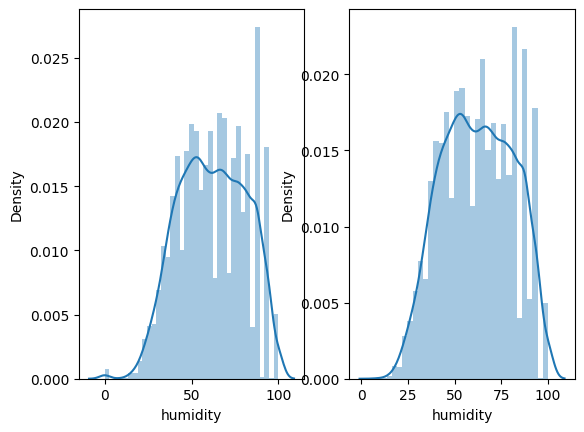

In [39]:
plt.subplot(1,2,1)
sns.distplot(df["humidity"])
plt.subplot(1,2,2)
sns.distplot(df_new["humidity"])
plt.show

In [40]:
print(" Humidity with outlier",df['humidity'].skew())
print('Humidity without outlier',df_new['humidity'].skew())
print()
print(" Windspeed with outlier",df['windspeed'].skew())
print('Windspeed without outlier',df_new['windspeed'].skew())

 Humidity with outlier -0.08633518364548579
Humidity without outlier -0.0408771961055731

 Windspeed with outlier 0.5887665265853951
Windspeed without outlier 0.22811718277670984


#### Now skewness is also came near to zero


####  Now we can see that displot is also seems skewed and max and min value of both Humidity and windspeed came in range

In [41]:
df_new.describe()

,temp,atemp,humidity,windspeed,Total_booking,hour
count,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000
mean,20.277618,23.722575,62.337187,12.284399,191.882685,11.495394
std,7.793356,8.448536,18.900912,7.443142,181.238751,6.937934
min,0.820000,0.760000,8.000000,0.000000,1.000000,0.000000
25%,13.940000,16.665000,47.000000,7.001500,42.000000,6.000000
50%,20.500000,24.240000,62.000000,11.001400,145.000000,11.000000
75%,26.240000,31.060000,78.000000,16.997900,285.000000,18.000000
max,41.000000,45.455000,100.000000,31.000900,977.000000,23.000000


<AxesSubplot: ylabel='windspeed'>

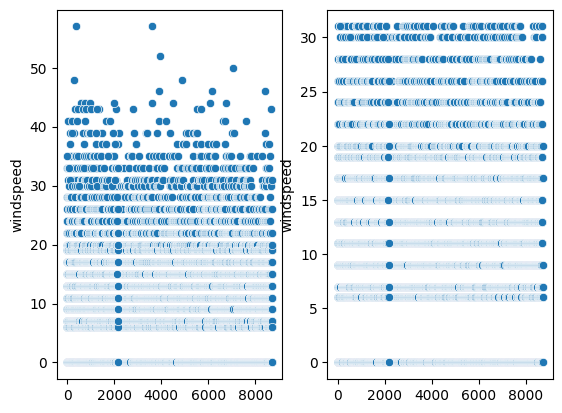

In [42]:
plt.subplot(1,2,1)
sns.scatterplot(df['windspeed'])
plt.subplot(1,2,2)
sns.scatterplot(df_new['windspeed'])


# 5. Perform Correlation Analysis:

### a) Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity", "windspeed"]

In [43]:
df_new[["temp", "atemp", "humidity", "windspeed"]].corr()

,temp,atemp,humidity,windspeed
temp,1.000000,0.985054,-0.077204,-0.003331
atemp,0.985054,1.000000,-0.056873,-0.041233
humidity,-0.077204,-0.056873,1.000000,-0.303482
windspeed,-0.003331,-0.041233,-0.303482,1.000000


<AxesSubplot: >

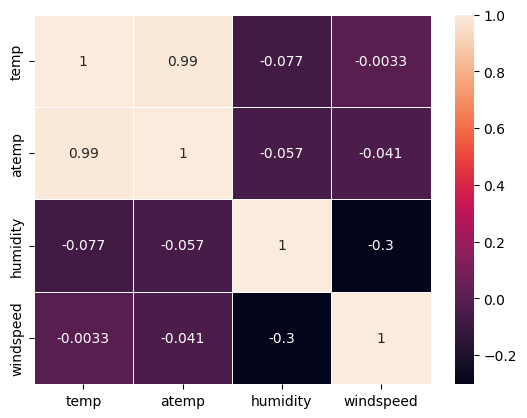

In [44]:
sns.heatmap(df_new[["temp", "atemp", "humidity", "windspeed"]].corr(), annot=True, linewidths=0.5)

  ####   Only two columns temp and atemp have collinearity. But other column like humidity and windspeed does have collinearity which is good for us, because now we can applly different alogorithm like LinerRegression which is very much effected by multicollinearity 

<AxesSubplot: >

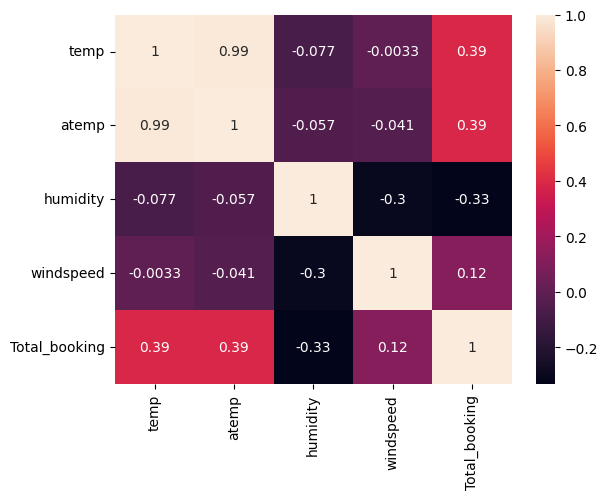

In [45]:
sns.heatmap(df_new[["temp", "atemp", "humidity", "windspeed",'Total_booking']].corr(), annot=True)

# 6. Perform Data Visualization:

### a. Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well

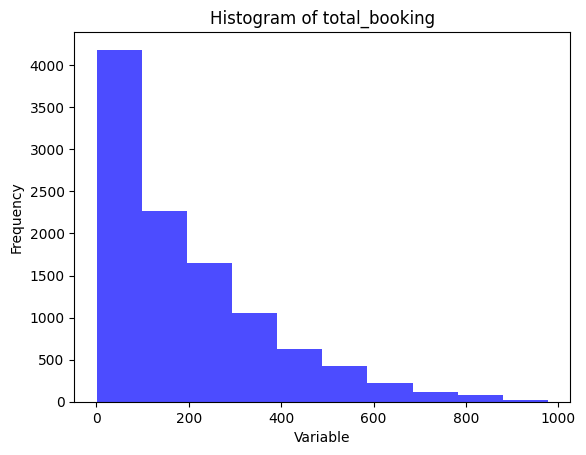

In [46]:
plt.hist(df_new['Total_booking'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('Histogram of total_booking')
plt.show()

C:\Users\VISHAL_\AppData\Local\Temp\ipykernel_21860\2597907178.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Total_booking'], shade=True, color='blue')


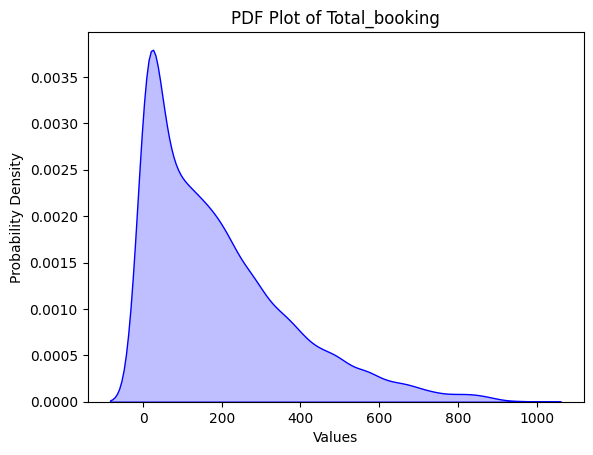

In [47]:
sns.kdeplot(df['Total_booking'], shade=True, color='blue')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('PDF Plot of Total_booking')
plt.show()

<AxesSubplot: ylabel='Total_booking'>

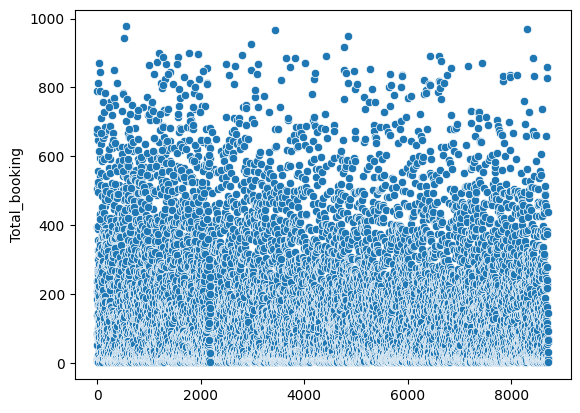

In [48]:
sns.scatterplot(df_new['Total_booking'])

### b. Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)

In [49]:
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)>

In [50]:
df_new.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'hour', 'weekday',
       'month'],
      dtype='object')

C:\Users\VISHAL_\AppData\Local\Temp\ipykernel_21860\2662385518.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


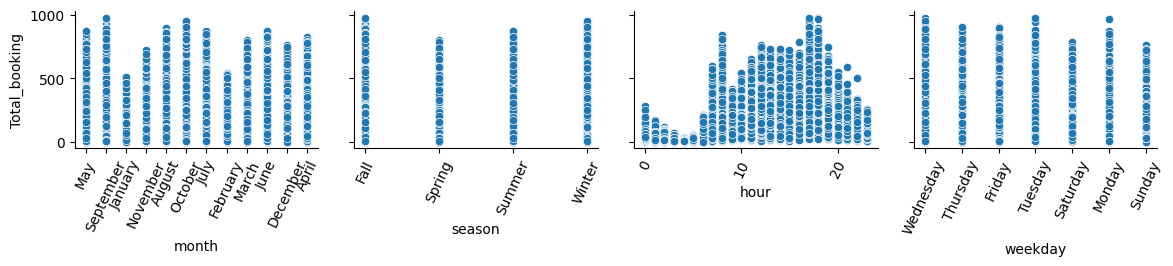

In [51]:

g= sns.pairplot(data=df_new, x_vars=['month', 'season', 'hour', 'weekday'], y_vars=['Total_booking'],height=2, aspect=1.5)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

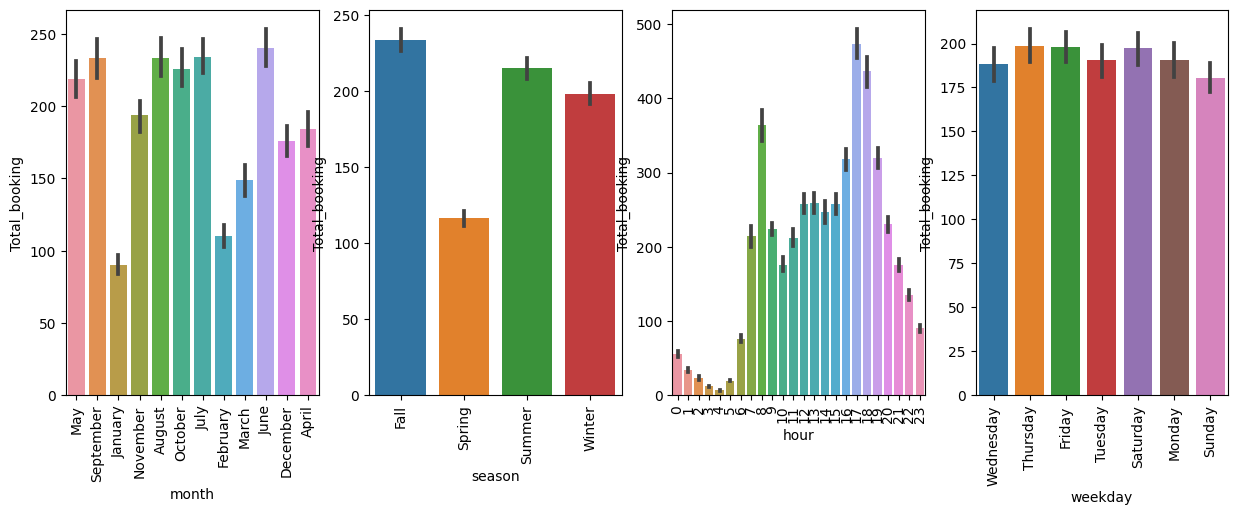

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.barplot(df_new,x='month',y='Total_booking')
plt.xticks(rotation=90)
plt.subplot(1,4,2)
sns.barplot(df_new,x='season',y='Total_booking')
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.barplot(df_new,x='hour',y='Total_booking')
plt.xticks(rotation=90)
plt.subplot(1,4,4)
sns.barplot(df_new,x='weekday',y='Total_booking')
plt.xticks(rotation=90)


plt.show

### c. Use Histograms to plot all the continuous variables present in the data

In [53]:
df_new.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'hour', 'weekday',
       'month'],
      dtype='object')

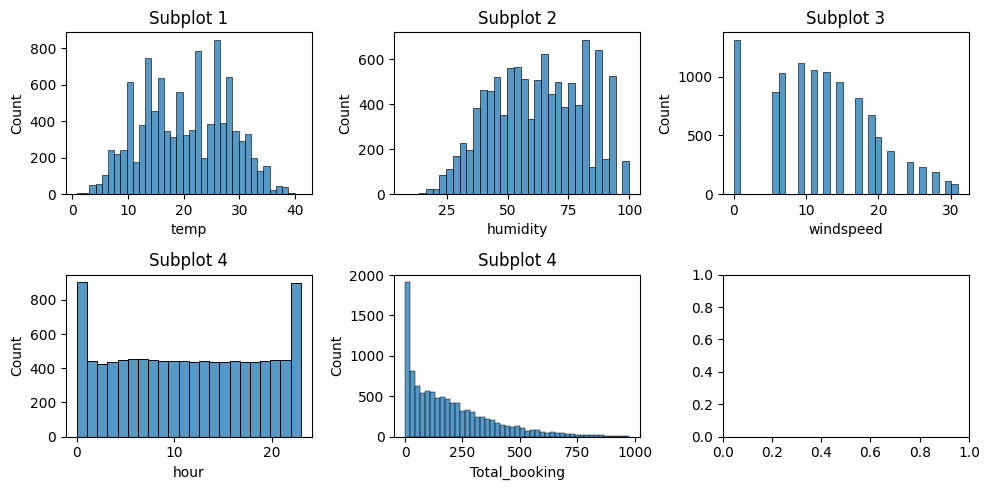

In [54]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

# Plot data in each subplot
sns.histplot(data=df_new, x='temp', ax=axes[0, 0])
axes[0, 0].set_title('Subplot 1')

sns.histplot(data=df_new, x='humidity', ax=axes[0, 1])
axes[0, 1].set_title('Subplot 2')

sns.histplot(data=df_new, x='windspeed', ax=axes[0, 2])
axes[0, 2].set_title('Subplot 3')

sns.histplot(data=df_new, x='hour' ,ax=axes[1, 0])
axes[1, 0].set_title('Subplot 4')

sns.histplot(data=df_new, x='Total_booking' ,ax=axes[1, 1])
axes[1, 1].set_title('Subplot 4')

plt.tight_layout()
plt.show()





# 7. Convert the categorical variables into one hot vector

In [55]:
df_new=df_new.drop("date",axis=1)

In [56]:
df['weather'].value_counts()

 Clear + Few clouds            7192
 Mist + Cloudy                 2834
 Light Snow, Light Rain         859
 Heavy Rain + Thunderstorm        1
Name: weather, dtype: int64

In [57]:
df.groupby(['weather'])['Total_booking'].sum()


weather
 Clear + Few clouds            1476063
 Heavy Rain + Thunderstorm         164
 Light Snow, Light Rain         102089
 Mist + Cloudy                  507160
Name: Total_booking, dtype: int64

In [58]:
df['weather'].value_counts()

 Clear + Few clouds            7192
 Mist + Cloudy                 2834
 Light Snow, Light Rain         859
 Heavy Rain + Thunderstorm        1
Name: weather, dtype: int64

In [59]:
df=df.drop("date",axis=1)

In [60]:
df.sample(4)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,hour,weekday,month
1989,Winter,0,1,Clear + Few clouds,18.04,21.970,47,12.9980,11,1,Thursday,October
5630,Winter,0,1,Clear + Few clouds,18.04,21.970,77,11.0014,483,7,Monday,October
1489,Spring,0,1,Mist + Cloudy,11.48,14.395,93,7.0015,226,7,Friday,February
2802,Fall,0,1,Clear + Few clouds,30.34,33.335,48,8.9981,389,20,Friday,July


### We have 4 catagorical column ['season' ,'weather','weekday','month']. These are nominal categorical column so we will apply one hot encoding

In [61]:
# We will use column transform

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [62]:
df_new.shape

(10638, 12)

In [63]:
TRN= ColumnTransformer(transformers=[
('tnf1',OneHotEncoder(sparse=False,drop='first'),['season' ,'weather','weekday','month'])


],remainder='passthrough')
encoded_data = TRN.fit_transform(df_new)


c:\Users\VISHAL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
encoded_data

array([[  0.    ,   1.    ,   0.    , ...,  16.9979, 504.    ,  19.    ],
       [  0.    ,   0.    ,   0.    , ...,  19.0012,   5.    ,   4.    ],
       [  1.    ,   0.    ,   0.    , ...,  22.0028, 139.    ,   9.    ],
       ...,
       [  1.    ,   0.    ,   0.    , ...,  19.9995, 159.    ,  22.    ],
       [  0.    ,   1.    ,   0.    , ...,   8.9981,  29.    ,   5.    ],
       [  0.    ,   0.    ,   0.    , ...,  16.9979, 224.    ,  16.    ]])

In [65]:
encoded_data.shape

(10638, 31)

## Change encoded data into dataframes


In [66]:
df_coded=pd.DataFrame(encoded_data)
print(df_new.head(3))

pd.set_option('display.max_columns', None)
df_coded.head(3)

   season holiday workingday              weather   temp   atemp  humidity  \
0  Summer       0          1   Clear + Few clouds  22.14  25.760        77   
1    Fall       0          1   Clear + Few clouds  28.70  33.335        79   
2  Spring       0          1   Clear + Few clouds   5.74   6.060        50   

   windspeed  Total_booking  hour    weekday      month  
0    16.9979            504    19  Wednesday        May  
1    19.0012              5     4  Wednesday  September  
2    22.0028            139     9   Thursday    January  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.14,25.760,77.0,16.9979,504.0,19.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,28.70,33.335,79.0,19.0012,5.0,4.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.74,6.060,50.0,22.0028,139.0,9.0


### Here 29th column is our target column

In [67]:
df_coded.columns

RangeIndex(start=0, stop=31, step=1)

In [68]:
df_coded.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.14,25.760,77.0,16.9979,504.0,19.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,28.70,33.335,79.0,19.0012,5.0,4.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.74,6.060,50.0,22.0028,139.0,9.0


In [69]:
df_coded = df_coded.rename(columns={29: 'Total_booking'})

In [70]:
df_coded.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,Total_booking,30
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.14,25.76,77.0,16.9979,504.0,19.0


In [71]:
file_path = 'output.csv'

# Write the DataFrame to a CSV file
df_coded.to_csv(file_path, index=False)

# 8. Split your dataset for training and testing

In [72]:
from sklearn.model_selection import train_test_split

X = df_coded.drop('Total_booking', axis=1)  # Features
y = df_coded['Total_booking']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [73]:
print(X_train.shape)
print(X_test.shape)

(8510, 30)
(2128, 30)


# 9. Fit various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor)

In [72]:
# Random Forest Regressor

rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_RADFrst = rf_regressor.predict(X_test)
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_RADFrst)
r2 = r2_score(y_test, y_pred_RADFrst)

In [73]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
from math import sqrt
rmse = sqrt(mse)
print(f"RMSE: {rmse:.2f}")

Mean Squared Error: 4441.98
R-squared (R2): 0.87
RMSE: 66.65


In [74]:
# ADA boost Regressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=3)  # You can adjust the depth as needed
adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)
adaboost_regressor.fit(X_train, y_train)


c:\Users\VISHAL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=42)

In [75]:
y_pred_Ada = adaboost_regressor.predict(X_test)

# Calculate MSE, RMSE, and R2
mse = mean_squared_error(y_test, y_pred_Ada)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_Ada)


In [76]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

Mean Squared Error: 14670.78
R-squared (R2): 0.57
RMSE: 121.12


In [77]:
#Bagging Regressor

from sklearn.ensemble import BaggingRegressor
base_estimator = DecisionTreeRegressor(max_depth=3)  # You can adjust the depth as needed
bagging_regressor = BaggingRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagg = bagging_regressor.predict(X_test)

# Calculate MSE, RMSE, and R2
mse = mean_squared_error(y_test, y_pred_bagg)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_bagg)

c:\Users\VISHAL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [78]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

Mean Squared Error: 16711.57
R-squared (R2): 0.51
RMSE: 129.27


In [79]:
# SVR 
from sklearn.svm import SVR
svr_regressor = SVR(kernel='linear', C=1.0)  # You can choose different kernels and adjust the hyperparameters
svr_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Calculate MSE, RMSE, and R2
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error: 24426.37
Root Mean Squared Error: 156.29
R-squared (R2): 0.29


In [80]:
# K-Neighbors Regressor
# Create and train the K-Neighbors Regressor
k_neighbors_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
k_neighbors_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = k_neighbors_regressor.predict(X_test)

# Calculate MSE, RMSE, and R2
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error: 15400.82
Root Mean Squared Error: 124.10
R-squared (R2): 0.55


# 10. Display a Factor plot to visualize the RMSE values achieved by different modeling algorithm

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of modeling algorithm names
models = ["Random Forest", "AdaBoost", "Bagging", "SVR", "K-Neighbors"]

# List of corresponding RMSE values
rmse_values = [66.65, 121.12, 129.27, 156.29, 124.10]

# Create a data frame
data1 = {"Model": models, "RMSE": rmse_values}
data2 = pd.DataFrame(data1)


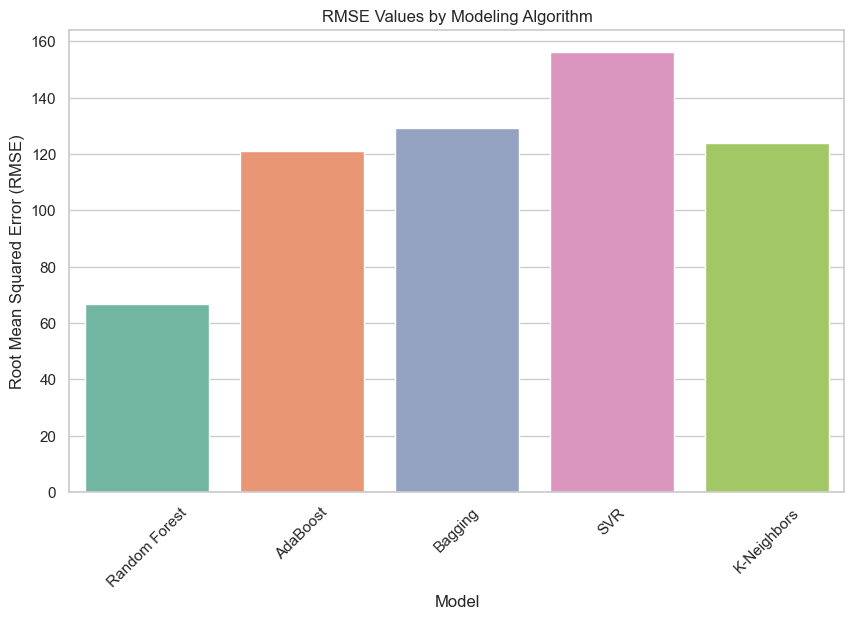

In [83]:
#Create a factor plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plot = sns.barplot(x="Model", y="RMSE", data=data2,  palette="Set2")
plt.title("RMSE Values by Modeling Algorithm")

# Set axis labels and adjust plot aesthetics
plot.set(xlabel="Model", ylabel="Root Mean Squared Error (RMSE)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

### random forest performimg best from all the algorithm so we perform Gridsearch on random forest model 

# 11. Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
# parameters of random forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [78]:
rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=2)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

c:\Users\VISHAL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Hyperparameters:  {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score:  4467.153346255918


#### Best Hyperparameters:  {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score:  4467.153346255918

In [79]:
best_rf_regressor = grid_search.best_estimator_
y_pred1 = best_rf_regressor.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
from math import sqrt
rmse = sqrt(mse)
print(f"RMSE: {rmse:.2f}")

Mean Squared Error: 4428.88
R-squared (R2): 0.87
RMSE: 66.55


# 12. Perform prediction on the test set and print the mean_squared_log_error


In [81]:
y_test.shape

(2128,)

In [82]:
y_test.head(4)

1112     66.0
1683    111.0
4341      4.0
1498     23.0
Name: Total_booking, dtype: float64

In [83]:
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred1)
print(f"Mean Squared Logarithmic Error: {msle:.4f}")

Mean Squared Logarithmic Error: 0.1550


In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test and y_pred are your actual and predicted values respectively
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = mean_squared_error(y_test, y_pred1, squared=False)  # Take the square root of MSE to get RMSE
r2 = r2_score(y_test, y_pred1)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 44.043820678189604
Mean Squared Error: 4428.883706307189
Root Mean Squared Error: 66.54985880005448
R-squared: 0.8704733490162448


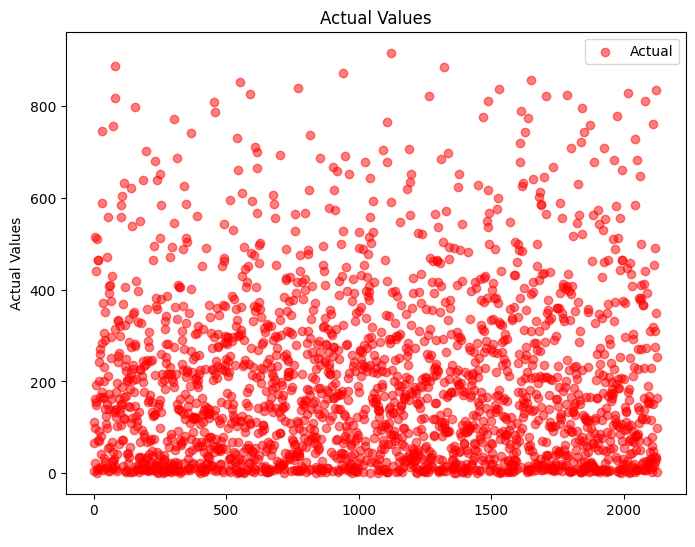

In [100]:
import matplotlib.pyplot as plt

# Assuming y_true is your true values
plt.figure(figsize=(8, 6))

# Plotting actual values
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual', alpha=0.5)  

plt.title('Actual Values')
plt.xlabel('Index')
plt.ylabel('Actual Values')

plt.legend()
plt.show()

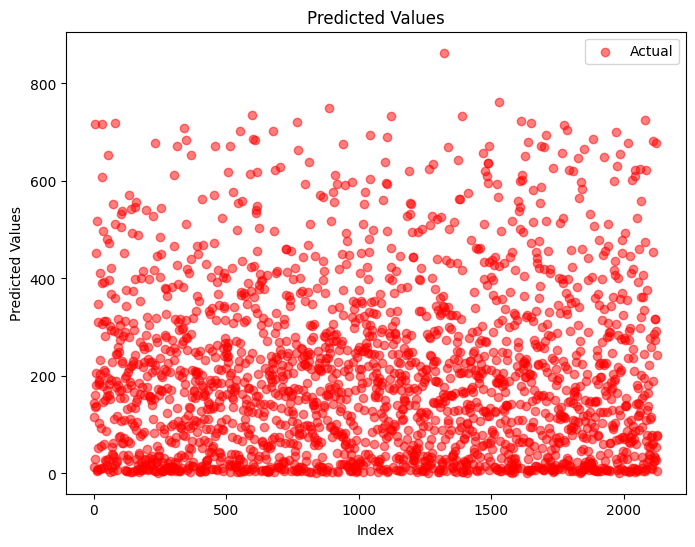

In [103]:
import matplotlib.pyplot as plt

# Assuming y_true is your true values
plt.figure(figsize=(8, 6))

# Plotting actual values
plt.scatter(range(len(y_pred1)), y_pred1, color='red', label='Actual', alpha=0.5)  

plt.title('Predicted Values')
plt.xlabel('Index')
plt.ylabel('Predicted Values')

plt.legend()
plt.show()

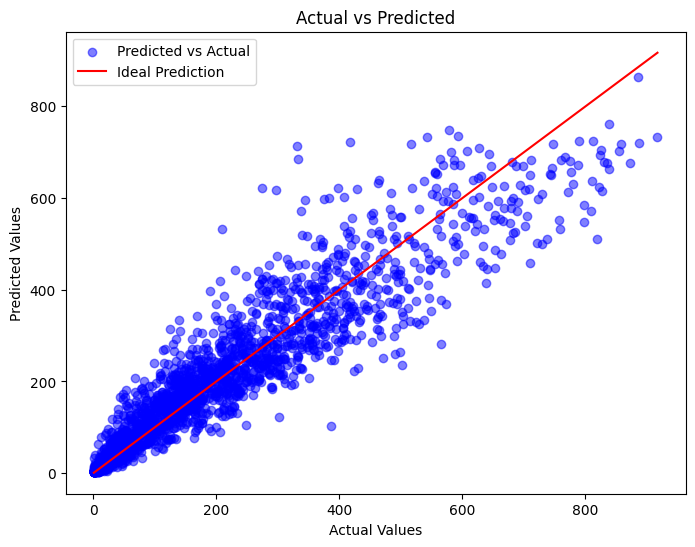

In [102]:
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted values respectively
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred1, color='blue', label='Predicted vs Actual', alpha=0.5)  # Plotting actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction')  # Diagonal line for reference
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()